# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

---
# TRABAJO PRÁCTICO ENTREGABLE - PARTE I

## INTEGRANTES DEL GRUPO IV:
*   María Belén Acotto
*   Juan Ignacio Barrionuevo Galtier
*   Gonzalo Heredia Edelstein

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import operator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore') ## Ignorar algunos warning largos

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
print(boston['DESCR'])   # descripción del dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [6]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

---

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos de Boston, es un dataset de la librería de sklearn, y el mismo, trata refiere sobre la recopilación de datos de censo en Estados Unidos, enfocados sobre viviendas en la ciudad de Boston. El dataset tiene una dimensión de 506 filas, y 14 columnas.

2. La variable objetivo a predecir es MEDV, que es el valor medio de aquellas viviendas ocupadas por sus propios dueños, en miles de dolares.

3. Para la predicción de la columna MEDV, contamos con 13 variables. A continuación, procedemos a la explicación de cada uno de ellas:
    * **CRIM:** Tasa de criminalidad per cápita por ciudad.
    * **ZN:** Proporción de terrenos residenciales, dividido en zonas, para lotes de más de 25,000 pies cuadrados.
    * **INDUS:** Proporción de acres comerciales no minoristas por ciudad.
    * **CHAS:** Variable dummy o ficticia de Charles River. Puede tener dos valores: 1 si limita con el río, y 0 si no lo hace.
    * **NOX:** Concentración de óxidos nítricos (partes por 10 millones).
    * **RM:** Número medio de habitaciones por vivienda.
    * **AGE:** Proporción de propiedades ocupadas por sus propietarios, construidas antes de 1940.
    * **DIS:** Distancias ponderadas a cinco centros de empleo de Boston.
    * **RAD:** Índice de accesibilidad a autopistas radiales.
    * **TAX:** Tasa de impuesto a la propiedad de valor total por diez mil dólares.
    * **PTRATIO:** Proporción de alumnos por profesor por ciudad.
    * **B:** Es el resultado de 1000(Bk - 0.63)^2 donde Bk es la proporción de personas tez negras por ciudad.
    * **LSTAT:** Porcentaje de personas pobres (clase baja) por ciudad.

4. Los atributos que mas determinen la prediccion desde nuestro punto de vista, sin previo analisis, serian:

* CRIM
* ZN
* RM
* TAX
* DIS

5. La primer variable que nos llamó la atención, fue la variable **B**, que indica una proporción de personas de tez negras por ciudad. Esta variable contempla discriminación racial, con lo que consideramos que no debería de influir a la predicción del valor medio de la población. El color de tu piel no debería afectar al precio de la propiedad. Creemos que podría traer muchas confusiones, aparte que eticamente, nos parece incorrecta esta discriminación.
La variable CRIM puede provocar cierto sesgo, ya que se pudieron haber evitado zonas con mayor criminalidad si es que se hicieron de forma personal.

In [7]:
# Initializing the dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Adding target variable to dataframe
df['MEDV'] = boston.target 

# Check the shape of dataframe
df.shape

(506, 14)

In [8]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


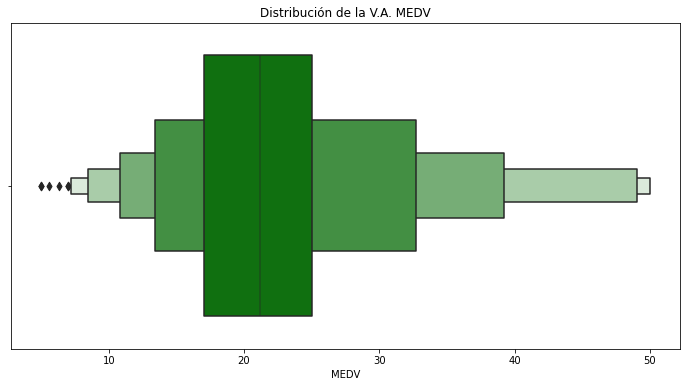

In [9]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df, x="MEDV", color='green')
plt.title('Distribución de la V.A. MEDV')

plt.show()

In [10]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

---

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

### ScatterPlot contra Target

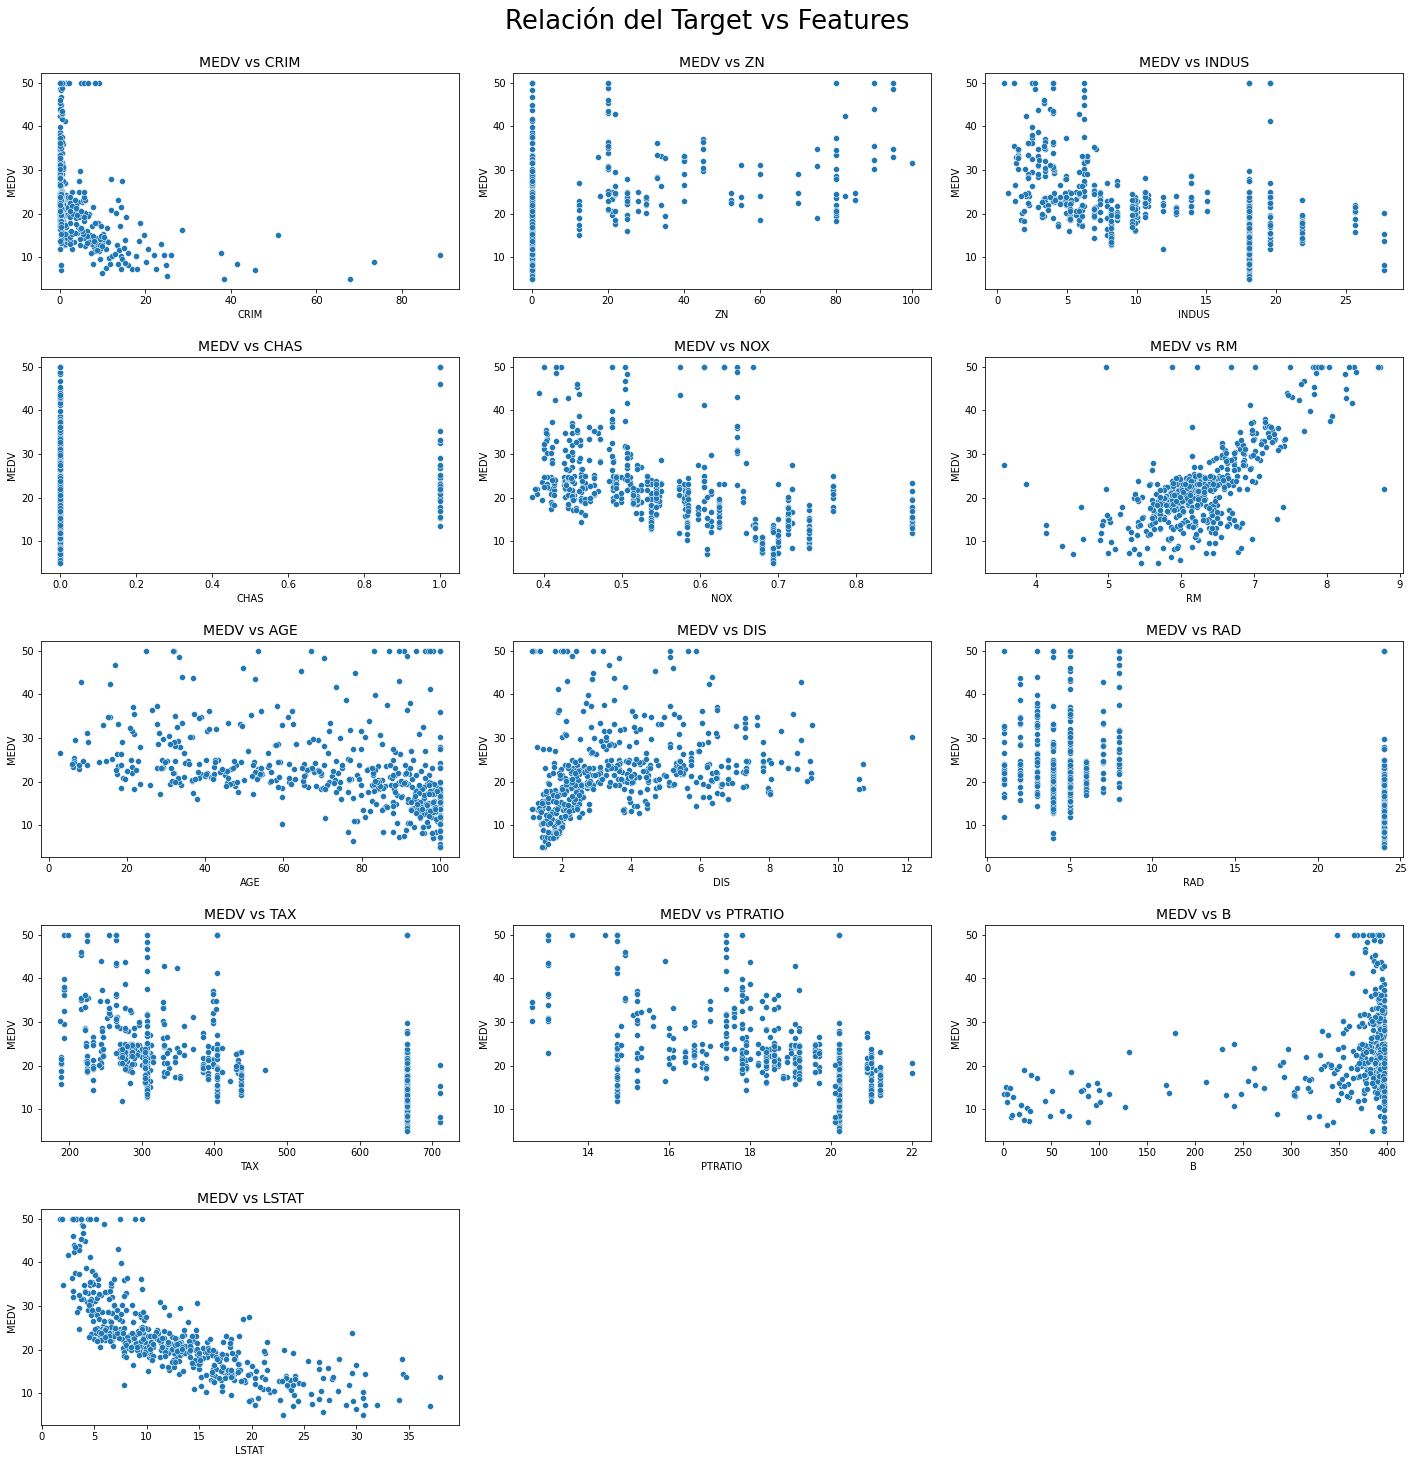

In [11]:
n_cols = 3
n_rows = 5
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
count = 0
for i in boston.feature_names:    
    # Calculamos filas y columnas
    row = math.floor(count / n_cols)
    col = count % n_cols
    # Configuramos visualización
    ax = axs[row, col]
    # Visualizamos la distribución de variable
    sns.scatterplot(data=df, x=i, y='MEDV', ax=ax)
    ax.set_title(f'MEDV vs {i}', fontsize=14)
    count =count +1

axs[4, 1].axis('off')
axs[4, 2].axis('off')
fig.tight_layout(pad=2.0)
fig.suptitle('Relación del Target vs Features', fontsize=26, y=1.02)
plt.show()

Viendo las graficas, los atributos que mas nos muestran mayor información para nuestra futura predicción son:
* **CRIM:** Observamos que cuanta mayor taza de criminalidad, menor frecuencia obtenermos. Lo cual, es lógico, pero también podemos creer que se produjo un sesgo aquí, ya que si la recolección de datos fue hecha asistiendo a la propiedad, el encuestador, pudo evitar zonas con tasas de criminalidad altas. También, podemos ver que las propiedades con mayor valor, se encuentran al obtener menor taza.
* **RM:** Podemos observar una tendencia algo lineal y creciente. Cuantas más habitaciones, mayor es el valor de la propiedad.
* **LSTAT:** Observamos una curva en los datos, que concuerda con la columna. Es decir, que cuanto mayor es la cantidad de personas de clase baja, menor es el valor de la propiedad, ya sea por el tipo de construcción, mantenimiento, zona en donde habita, etc.

También, podemos ver ciertas particularidades en las siguientes variables, pero la importacia de las mismas, es menor a las anteriores:
* **AGE:** Vemos que la distribución se concentra en su mayoría en las muestras con propiedades más antiguas.
* **DIS:** Tenemos distribuciones que parten de puntos bajos para el eje x e y, y se va abriendo.
* **TAX:** Encontramos mayor concentración de puntos cuanto menor es la taza de impuestos en al ciudad.

Analizaremos estas variables más adelante.

### EDA: Correlación de Pearson

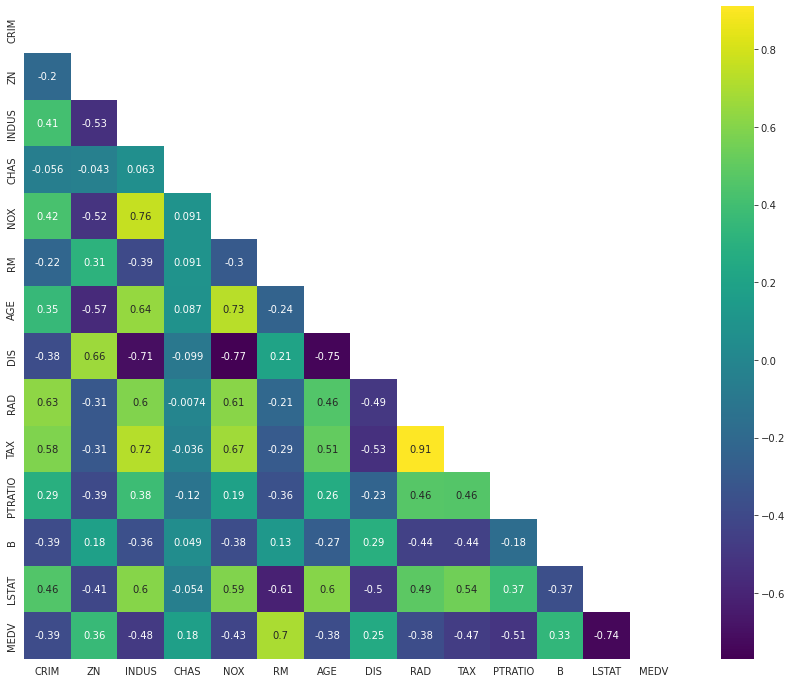

In [12]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(corr, annot=True, mask=mask, square=True, cmap='viridis')

Con la correlación de Pearson, podemos ver las variables que se adaptan mejor para estudiar algorítmos de tipo lineal.

---

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

Seleccionaremos el atributo **RM** para este análisis.

### Elección de una variable

In [13]:
feature = 'RM'
target = 'MEDV'

X = df.loc[:,feature].values
y = df.loc[:,target].values

In [14]:
X.shape, y.shape

((506,), (506,))

### Separación de conjuntos

Como es una regresión lineal simple, no es necesario escalar antes de separar el conjunto en Train y Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404,), (102,), (404,), (102,))

### Crear el modelo de Regresión Lineal Simple

In [17]:
slr_model = LinearRegression()
slr_model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression()

### Predecir el conjunto de Test

In [18]:
# Predecir el conjunto de test
y_train_pred = slr_model.predict(X_train.reshape(-1, 1))
y_test_pred = slr_model.predict(X_test.reshape(-1, 1))

### MSE para Train y Test

* MSE (Error Cuadrático Medio):
    * Más sensible a los cambios grandes, ignorando los cambios pequeños (menores a 1).
    * Se usa cuando queremos penalizar cualquier cambio abrupto de respuesta.


* RMSE (Raíz del error cuadrático medio):
    * Escalado entre el máximo y mínimo de salida.
    * Igualmente sensible a los cambios.

In [19]:
from sklearn.metrics import mean_squared_error

# evaluate:
train_error_slr = mean_squared_error(y_train, y_train_pred)
test_error_slr = mean_squared_error(y_test, y_test_pred)
print(f'Train error {train_error_slr.round(3)}, Test error {test_error_slr.round(3)}')  

Train error 42.82, Test error 46.907


In [20]:
#evaluate:
train_error_slr = math.sqrt(mean_squared_error(y_train, y_train_pred))
test_error_slr = math.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Train error {train_error_slr}, Test error {test_error_slr}') 

Train error 6.543735855131036, Test error 6.848894190115315


### Gráfico Resultante

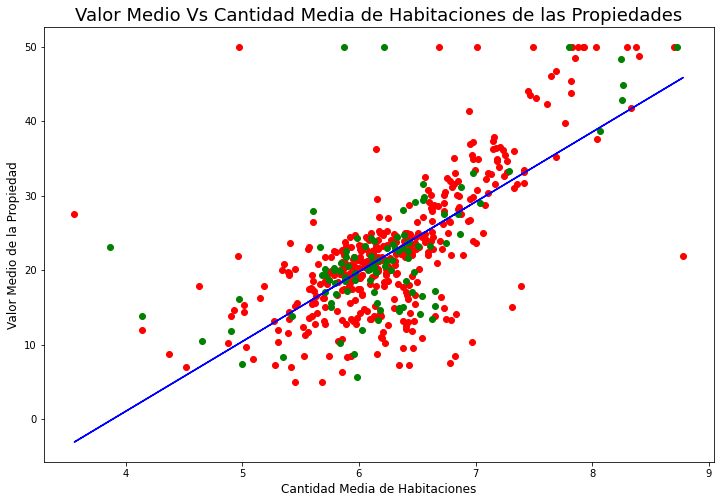

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, y_test, color='green')
plt.plot(X_train, y_train_pred, color='blue')
plt.title('Valor Medio Vs Cantidad Media de Habitaciones de las Propiedades', fontsize=18)
plt.xlabel('Cantidad Media de Habitaciones', fontsize=12)
plt.ylabel('Valor Medio de la Propiedad', fontsize=12)
plt.show()

### Interpretación

La regresión es el proceso estadístico de estimar las relaciones que existen entre variables. Se centra en estudiar las relaciones entre varible dependiente y una o más variables independientes.

En nuestro caso, elegimos 2 variables:
* MEDV > Variable Dependiente
* RM > Variable Independiente

En el gráfico, se aplicó un modelo de regresión lineal simple, es decir, con una sola variable independiente. Nos muestra una distribución del Valor medio de la propiedad respecto a la cantidad media de habitaciones. Adaptando esta distribución a un modelo de regresión lineal simple, el cual se lo utiliza con sus valores predeterminados, se generó la mejor recta o el mejor modelo de regresión lineal posible con los datos otorgados en el entrenamiento.

Podemos ver que existe una tendencia al decir que cuantas más habitaciones (eje x) haya en la propiedad, mayor será su precio, existiendo claramente algunas excepciones. Estas excepciones pueden ser por muchas razones, como por ejemplo, el que el precio de la propiedad sea influído por otra variable que no se incluyó en este primer análisis, o que la persona que haya cotizado la propiedad simplemente no se basó en la cantidad para cotizar la misma.

---

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

### Elección de una variable

In [22]:
feature = 'RM'
target = 'MEDV'

X = df.loc[:,feature].values
y = df.loc[:,target].values

In [23]:
X.shape, y.shape

((506,), (506,))

### Separación de conjuntos

Como es una regresión lineal simple, no es necesario escalar antes de separar el conjunto en Train y Test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404,), (102,), (404,), (102,))

### Entrenamiento en varios grados

In [26]:
polynomial_data = {'Degree': [],
                   'Train_MSE': [],
                   'Test_MSE': [],
                   'Train_RMSE': [],
                   'Test_RMSE': [],
                   'Train_Score': [],
                   'Test_Score': []
                  }

degrees = np.arange(35)
for degree in degrees:
    # train:
    poly_reg = PolynomialFeatures(degree)
    lin_reg = LinearRegression(fit_intercept=False)
    model = make_pipeline(poly_reg, lin_reg)
    model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    
    # predict:
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))
    
    # evaluate:
    train_MSE = mean_squared_error(y_train.reshape(-1, 1), y_train_pred)
    test_MSE = mean_squared_error(y_test.reshape(-1, 1), y_test_pred)
    train_RMSE = math.sqrt(mean_squared_error(y_train, y_train_pred))
    test_RMSE = math.sqrt(mean_squared_error(y_test, y_test_pred))
    train_score = model.score(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    test_score = model.score(X_test.reshape(-1, 1), y_test.reshape(-1, 1))
    
    polynomial_data['Degree'].append(degree)
    polynomial_data['Train_MSE'].append(train_MSE)
    polynomial_data['Test_MSE'].append(test_MSE)
    polynomial_data['Train_RMSE'].append(train_RMSE)
    polynomial_data['Test_RMSE'].append(test_RMSE)
    polynomial_data['Train_Score'].append(train_score)
    polynomial_data['Test_Score'].append(test_score)

#Mostramos los datos en un dataframe para que se vea de una manera prolija
pd.DataFrame(polynomial_data)

,Degree,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_Score,Test_Score
0,0,85.143720,81.582317,9.227335,9.032293,0.000000,-0.001890
1,1,42.820479,46.907352,6.543736,6.848894,0.497080,0.423944
2,2,37.745529,39.794731,6.143739,6.308307,0.556685,0.511292
3,3,36.395659,39.825762,6.032881,6.310766,0.572539,0.510911
4,4,34.808446,41.553926,5.899868,6.446233,0.591180,0.489688
5,5,33.131122,41.038289,5.755964,6.406113,0.610880,0.496020
6,6,33.130116,41.009177,5.755877,6.403841,0.610892,0.496378
7,7,33.060359,42.394109,5.749814,6.511076,0.611711,0.479370
8,8,33.060357,42.399257,5.749814,6.511471,0.611711,0.479307
9,9,32.854885,46.051260,5.731918,6.786108,0.614124,0.434457


### Gráfico de Curvas de Errores

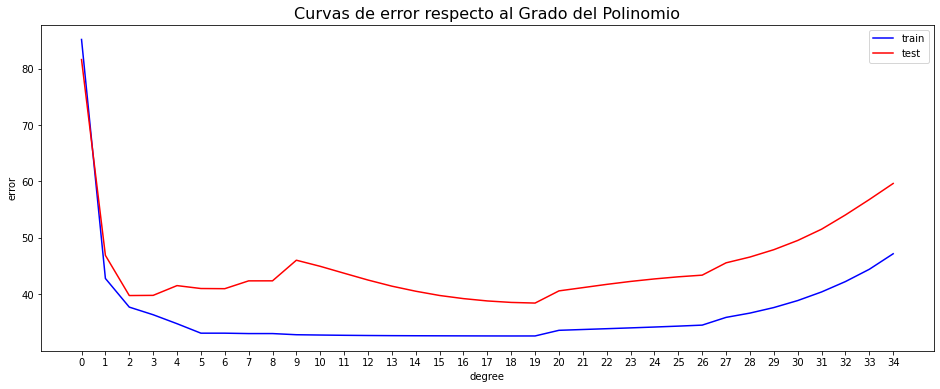

In [27]:
plt.figure(figsize=(16,6))
plt.plot(degrees, polynomial_data['Train_MSE'], color="blue", label="train")
plt.plot(degrees, polynomial_data['Test_MSE'], color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.xticks(degrees)
plt.title('Curvas de error respecto al Grado del Polinomio', fontsize=16)
plt.show()

### Interpretación de la Curva de Error

Teniendo en cuenta los valores arrojados en el dataframe de errores y observando la gráfica, podemos decir que
* A medida que aumentamos los grados en nuestra fórmula, podemos observar que la línea azul que nos muestra los resultados del MSE en el conjunto de Train baja hasta el grado 19, en donde comienza a subir considerablemente.
* A razón de esto, en la línea roja, que representa los resultados del MSE del conjunto de Test, empieza bajando como Train, aunque en el grado 2, se produce un quiebre y comienza a subir. Luego tenemos otro pico mínimo en el grado 19.
* Podemos decir que, a medida que aumenta la complejidad de la fórmula polinomial, el número de grados aumenta, por lo que aumentan las características de la misma, y esto hace que sea difícil de manejar.
* Lo que nos ocurre en el grado 2, es que el error en train como test es mínimo, y se produce cuando la línea viene en disminución. Luego, en el conjunto de test, comienza a subir, mientras que la línea de train sigue disminuyendo. Podemos decir que en este punto, train comienza a sobreajustarse para sus datos, obteniendo malos resultados en test.
* En el grado 19, el algorítmo llega a tener menor error, pero con un sobreajuste en train y con mucha complejidad sobre la fórmula. En el siguiente punto (elección del mejor modelo), graficaremos los resultados que obtenemos en el grado 19.

En clases se nos explicó, que cuando la línea de test del gráfico anterior comenzaba a subir, tendía a hacer "sobreajuste" (overfitting). Para expandir la explicación del profesor, estuvimos investigando más y tomamos como referencia los siguientes videos para expandir nuestra interpretación.

* [Overfitting (Regresión Polinomial)](https://youtu.be/ONSxjoV9LjM)
* [Regresión Polinomial](https://youtu.be/bvQenoLWZfc)

### Selección del BestModel y Gráfico del BestModel

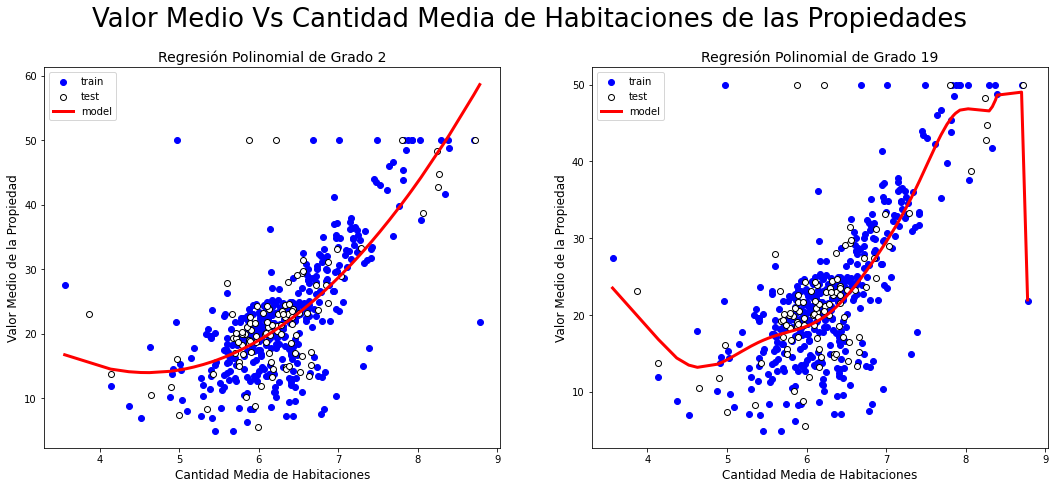

In [28]:
degrees = [2,19]
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
col_count = 0
for degree in degrees:
    # trainning:
    poly_reg = PolynomialFeatures(degree)
    lin_reg = LinearRegression(fit_intercept=False)
    model = make_pipeline(poly_reg, lin_reg)
    model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
    
    # predict:
    y_train_pred = model.predict(X_train.reshape(-1, 1))
    y_test_pred = model.predict(X_test.reshape(-1, 1))
    
    #Scatter
    axs[col_count].scatter(X_train, y_train, color="blue", label="train")
    axs[col_count].scatter(X_test, y_test, color="white", edgecolor="k", label="test")
    #Formar la línea
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X_train,y_train_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    axs[col_count].plot(x, y_poly_pred, color="red", label="model", linewidth=3)
    #Otras propiedades del Axes
    axs[col_count].set_title(f'Regresión Polinomial de Grado {degree}', fontsize=14)
    axs[col_count].set_xlabel('Cantidad Media de Habitaciones', fontsize=12)
    axs[col_count].set_ylabel('Valor Medio de la Propiedad', fontsize=12)
    axs[col_count].legend()
    
    col_count += 1

fig.suptitle('Valor Medio Vs Cantidad Media de Habitaciones de las Propiedades', fontsize=26, y=1)
plt.show()

### Interpretación del BestModel

En el gráfico, se aplicó un modelo de regresión polinomial con una sola variable independiente. Nos muestra una distribución del valor medio de la propiedad respecto a la cantidad media de habitaciones, adaptando esta distribución a un modelo de regresión polinomial con diferentes grados, para que la recta polinomial se adapte a nuestro modelo.

Como elegimos representar 2 modelos con MSE bajos, daremos una interpretación de cada uno.

* Regresión Polinomial Grado 2
    * Obtenemos un modelo que se adapta genéricamente a los datos de train.
    * Podemos ver algunos puntos que no entran en nuestras predicciones, lo cual justifica nuestro márgen de error.
    * Se adapta bastante bien a nuestros datos de train y test, a diferencia del modelo lineal simple. 
* Regresión Polinomial Grado 19
    * Obtenemos un modelo que se adapta mejor a nuestros datos de train, pero podemos ver que al finalizar la línea, esta termina exactamente en un punto de train que bien podría ser un outlier, lo cual nos hace creer que puede estar sobreajustando el modelo.
    * Al ser un polinomio de grado superior, termina produciendo resultados extraños en la extrapolación.
    * Creemos que no es un grado que debamos utilizar, ya que se recomienda no usar polinomios de alto grado, ya que tienden a ser afectados severamente a cambios en cuanto al valor del target.

---

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

### Selección de variables

Para la selección de variables, decidimos tomar las 3 que consideramos más importantes dentro del análisis.
* CRIM
* RM
* LSTAT

In [29]:
features = [x for x in boston['feature_names'] if x in ['CRIM','RM','LSTAT']]
target = 'MEDV'

X = df.loc[:,features].values
y = df.loc[:,target].values.reshape(-1,1)

X.shape, y.shape

((506, 3), (506, 1))

### Separación de conjuntos

Como es una regresión lineal simple, no es necesario escalar antes de separar el conjunto en Train y Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 3), (102, 3), (404, 1), (102, 1))

### Entrenamiento en varios grados

In [31]:
polynomial_multi_data = { 'Degree': [],
                           'Train_MSE': [],
                           'Test_MSE': [],
                           'Train_RMSE': [],
                           'Test_RMSE': []
                        }

degrees = np.arange(1,10)
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)    # usaremos polinomios de grado 3
    X_poly = pf.fit_transform(X_train)  # transformamos la entrada en polinómica
    X_poly_test = pf.transform(X_test)  # transformamos la entrada de test en polinómica
    
    regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
    # instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X_poly, y_train)
    regresion_lineal.fit(X_poly, y_train) 
    
    # predict:
    y_train_pred = regresion_lineal.predict(X_poly)
    y_test_pred = regresion_lineal.predict(X_poly_test)
    
    # evaluate:
    train_MSE = mean_squared_error(y_train.reshape(-1, 1), y_train_pred)
    test_MSE = mean_squared_error(y_test.reshape(-1, 1), y_test_pred)
    train_RMSE = math.sqrt(mean_squared_error(y_train, y_train_pred))
    test_RMSE = math.sqrt(mean_squared_error(y_test, y_test_pred))
    
    polynomial_multi_data['Degree'].append(degree)
    polynomial_multi_data['Train_MSE'].append(round(train_MSE,3))
    polynomial_multi_data['Test_MSE'].append(format(test_MSE,'.3f'))
    #polynomial_multi_data['Test_MSE'].append(round(test_MSE,3))
    polynomial_multi_data['Train_RMSE'].append(round(train_RMSE,3))
    polynomial_multi_data['Test_RMSE'].append(format(test_RMSE,'.3f'))

#Mostramos los datos en un dataframe para que se vea de una manera prolija
pd.DataFrame(polynomial_multi_data, index=degrees)

,Degree,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE
1,1,27.786,38.758,5.271,6.226
2,2,15.834,31.847,3.979,5.643
3,3,12.289,52.849,3.506,7.270
4,4,8.381,43.437,2.895,6.591
5,5,7.812,402.475,2.795,20.062
6,6,6.974,419022.895,2.641,647.320
7,7,6.091,2351823431.539,2.468,48495.602
8,8,5.012,233821896559.684,2.239,483551.338
9,9,6.686,1657994658074691.250,2.586,40718480.547


### Análisis y Selección del BestModel

Observando los resultados del error, concluimos que el mejor polinomio a tomar para nuestro análisis es el de **grado 2**, ya que, por más que los resultados mejoran en nuestro conjunto de train al aumentar el grado, podemos ver el sobreajuste que se genera en nuestro conjunto de test, que crece a grandes rasgos.

A continuación, se hará nuestro **BestModel** de grado 2.

In [32]:
#Regresion Polinomial
pf = PolynomialFeatures(degree = 2)    # usaremos polinomios de grado 3
X_poly = pf.fit_transform(X_train)  # transformamos la entrada en polinómica
X_poly_test = pf.transform(X_test) # Aplicamos solo la transformación a nuestro conjunto de test

reg_lin = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X_poly,y_train)
reg_lin.fit(X_poly,y_train)

#Predecimos
y_train_pred = reg_lin.predict(X_poly)
y_test_pred = reg_lin.predict(X_poly_test)

train_MSE = mean_squared_error(y_train, y_train_pred)
test_MSE = mean_squared_error(y_test, y_test_pred)
train_RMSE = math.sqrt(mean_squared_error(y_train, y_train_pred))
test_RMSE = math.sqrt(mean_squared_error(y_test, y_test_pred))

print('w = ' + str(reg_lin.coef_) + ', b = ' + str(reg_lin.intercept_))
print(f'\nError Cuadrático Medio (Train) = {round(train_MSE,3)}')
print(f'Error Cuadrático Medio (Test) = {round(test_MSE,3)}')
print(f'Raíz del Error Cuadrático Medio (Train) = {round(train_RMSE,3)}')
print(f'Raíz del Error Cuadrático Medio (Test) = {round(test_RMSE,3)}')

# calculamos el coeficiente de determinación R2
r2 = reg_lin.score(X_poly, y_train)
print(f'Coeficiente de Determinación R2 = {round(r2,3)}')

w = [[ 0.00000000e+00  2.22101786e+00 -1.61332595e+01 -8.90400191e-01
   4.91808529e-03 -3.12676166e-01 -3.71434308e-02  1.76581959e+00
  -7.67139462e-02  2.90646524e-02]], b = [65.32733714]

Error Cuadrático Medio (Train) = 15.834
Error Cuadrático Medio (Test) = 31.847
Raíz del Error Cuadrático Medio (Train) = 3.979
Raíz del Error Cuadrático Medio (Test) = 5.643
Coeficiente de Determinación R2 = 0.814


### Interpretación

Los resultados obtenidos en este modelo polinónico multivariable son mejores que los dos modelos anteriores.

Esto es porque:
* Al aumentar el número de variables, enriquecemos nuestro modelo, ya que le estamos entregando mas variables independientes para calcular nuestro objetivo (target).
* Para que lo anterior sea beneficioso y no contraproducente, las variables elegidas deben tener cierta correlación.


---